In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_root = '/content/drive/My Drive/Colab Notebooks/dataset'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(data_root):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1009.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1003.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1001.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1008.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1006.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1007.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1004.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1000.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1005.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1002.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1015.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1013.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1014.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1019.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1018

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [28]:
X_train = []
Y_train = []
image_size = 224
labels = ['glioma','meningioma', 'pituitary']
for i in labels:
    folderPath = os.path.join(data_root, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [29]:
X_train.ndim

4

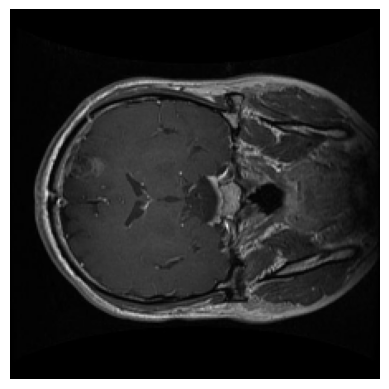

In [30]:
plt.axis('off')
plt.imshow(X_train[32])

In [31]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2022)
X_train.shape

(3079, 224, 224, 3)

In [32]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
)

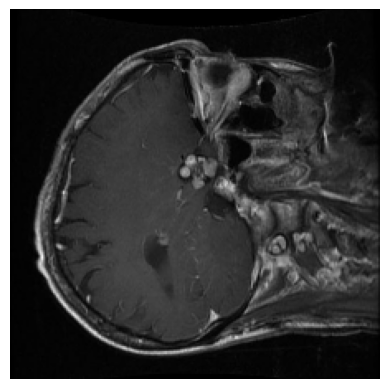

In [33]:
plt.axis('off')
plt.imshow(X_train[32])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.30, random_state = 2022)

In [35]:
len(X_train)

2155

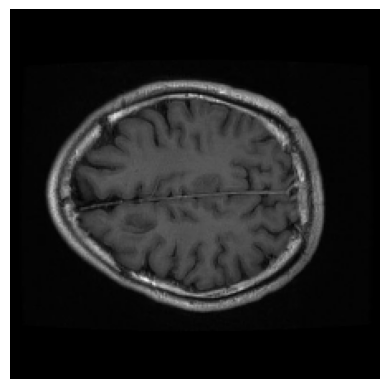

In [36]:
plt.axis('off')
plt.imshow(X_train[89])

In [37]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [44]:
rs_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [45]:
for layer in rs_model.layers:
    layer.trainable = False

In [46]:
model = Sequential()
model.add(rs_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 512)               51380736  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                

In [48]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, batch_size=32, epochs = 200, validation_split = 0.2)

Epoch 1/200
54/54 [==============================] - 14s 175ms/step - loss: 12.5768 - accuracy: 0.7320 - val_loss: 1.4031 - val_accuracy: 0.8840
Epoch 2/200
54/54 [==============================] - 8s 153ms/step - loss: 1.2711 - accuracy: 0.8898 - val_loss: 1.2787 - val_accuracy: 0.8654
Epoch 3/200
54/54 [==============================] - 7s 129ms/step - loss: 0.4867 - accuracy: 0.9182 - val_loss: 0.4849 - val_accuracy: 0.9072
Epoch 4/200
54/54 [==============================] - 8s 155ms/step - loss: 0.4070 - accuracy: 0.9171 - val_loss: 0.2382 - val_accuracy: 0.9350
Epoch 5/200
54/54 [==============================] - 8s 153ms/step - loss: 0.1705 - accuracy: 0.9594 - val_loss: 0.2134 - val_accuracy: 0.9443
Epoch 6/200
54/54 [==============================] - 7s 127ms/step - loss: 0.1308 - accuracy: 0.9617 - val_loss: 0.3438 - val_accuracy: 0.9281
Epoch 7/200
54/54 [==============================] - 8s 152ms/step - loss: 0.1059 - accuracy: 0.9698 - val_loss: 0.2360 - val_accuracy: 0.93

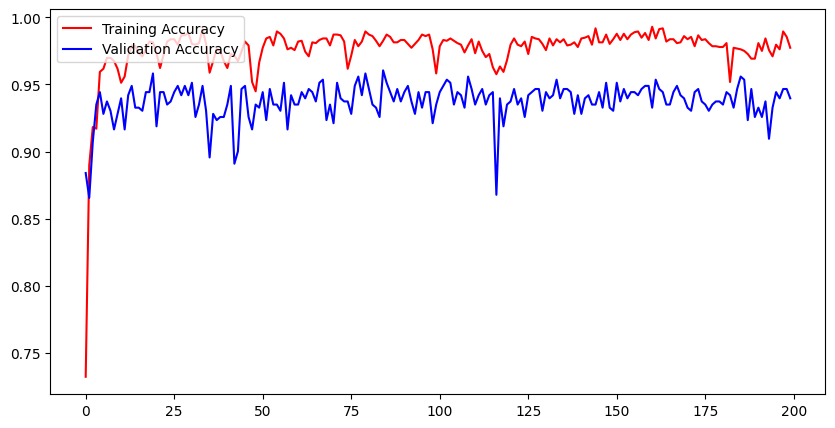

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

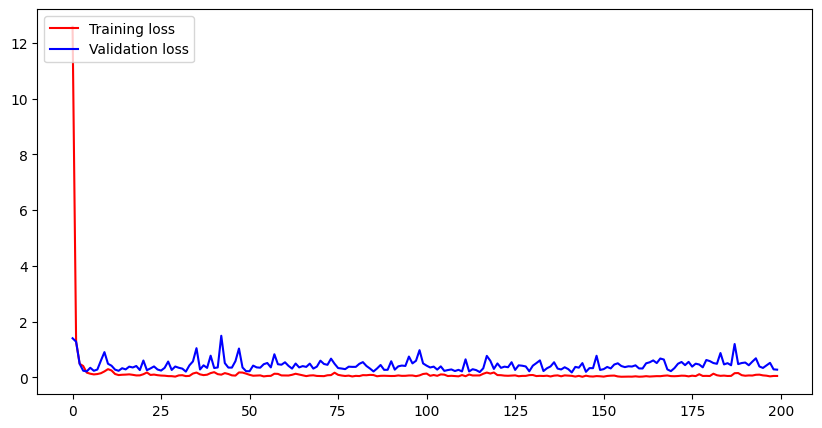

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [52]:
y_pred = model.predict(X_test)

29/29 [==============================] - 3s 92ms/step


In [53]:
a = y_pred[500]
indices = a.argmax()

if indices == 0:
    print('glioma_tumor')
elif indices == 1:
    print('meningioma_tumor')
elif indices == 2:
    print('pituitary_tumor')
else:
    print('Error in predicting the type of tumor')

pituitary_tumor


In [54]:
y_pred_labels = np.argmax(y_pred, axis = 1)
y_pred_labels

array([0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0,

In [55]:
y_test_new[500]

2

In [56]:
score = accuracy_score(y_test_new, np.argmax(model.predict(X_test), axis = 1))
score

29/29 [==============================] - 3s 94ms/step


0.9372294372294372

In [57]:
loss, metrics = model.evaluate(X_test, y_test)
loss, metrics

29/29 [==============================] - 3s 96ms/step - loss: 0.4026 - accuracy: 0.9372


(0.4026131331920624, 0.9372294545173645)

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, y_pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       439
           1       0.90      0.83      0.86       206
           2       0.96      0.99      0.98       279

    accuracy                           0.94       924
   macro avg       0.93      0.93      0.93       924
weighted avg       0.94      0.94      0.94       924

